# Bangaluru House Price Predications #

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Handle missing values 

In [6]:
df[df['location'].isna()].index.tolist()

[568]

In [7]:
df.loc[568,'location']

nan

In [8]:
df.drop(index = 568,inplace= True)

In [9]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

For Size columns

In [10]:
df[df['size'].isna()].index

Index([  579,  1775,  2264,  2809,  2862,  5333,  6423,  6636,  6719,  7680,
        8306,  8565,  8703, 10634, 11019, 11569],
      dtype='int64')

In [11]:
df.drop (index = [579,  1775,  2264,  2809,  2862,  5333,  6423,  6636,  6719,  7680,
        8306,  8565,  8703, 10634, 11019, 11569], inplace= True)

In [12]:
#for bath columns
mean_value =df['bath'].mean()
mean_value

np.float64(2.692586441189793)

In [13]:
df['bath'].fillna(value= 3,inplace=True)

/var/folders/8x/33rcnj0s6zn1gw5w8_qdh3gr0000gn/T/ipykernel_5183/1466456606.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(value= 3,inplace=True)


# Data Cleaning 

We did not require Area type and Availablity, socity ,balcony to predict our future price of a house so we will drop these columns.

In [14]:
df.drop(['area_type','availability','society','balcony'], axis=1,inplace= True)

In [15]:
df['size'].unique()
#We will change the value 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [17]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
df = df[df['bhk'] <= 6]

In [19]:
df.drop(['size'], axis=1,inplace= True)

In [20]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [21]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2090,), dtype=object)

Convert the total sqft into flot value where there is range input.

In [22]:
def convert_value_float(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
convert_value_float('1133 - 1384')

1258.5

In [24]:
df['total_sqft'] = df['total_sqft'].apply(convert_value_float)

# Feature Engineering

In [25]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']

In [26]:
df.location = df.location.apply(lambda x: x.strip())


In [27]:
locations_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
len(locations_stats)

1263

In [28]:
loaction_less_then_ten =(locations_stats[locations_stats <10])
loaction_less_then_ten

location
Volagerekallahalli             9
Richmond Town                  9
Kaverappa Layout               9
Jakkur Plantation              9
Chennammana Kere               9
                              ..
Kanakapura main  Road          1
Karnataka Shabarimala          1
Kasthuri Nagar East Of NGEF    1
Kathreguppe                    1
whitefiled                     1
Name: location, Length: 1013, dtype: int64

In [29]:
df['location'] = df['location'].apply(lambda x: 'other' if x in loaction_less_then_ten  else x)

In [30]:
len(df.location.unique())

251

In [31]:
df[df['total_sqft']/df['bhk']<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
70,other,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,160.0,6,22535.211268


In [32]:
df = df[~(df['total_sqft']/df['bhk']<300)]

In [33]:
df.shape

(12464, 6)

Fixing the total_sqft by bhk as we cannoot have 6 bhk within 1020 sqft so we have to standardize these SQft.

In [34]:
df[['price_per_sqft','bhk','total_sqft']]

,price_per_sqft,bhk,total_sqft
0,3699.810606,2,1056.0
1,4615.384615,4,2600.0
2,4305.555556,3,1440.0
3,6245.890861,3,1521.0
4,4250.000000,2,1200.0
...,...,...,...
13315,6689.834926,5,3453.0
13316,11111.111111,4,3600.0
13317,5258.545136,2,1141.0
13318,10407.336319,4,4689.0


In [35]:
df.shape

(12464, 6)

In [36]:
def remove_pps_outliers(data):
    data_out =pd.DataFrame()
    for key, subdata in data.groupby('location'):
        data_mean = np.mean(subdata.price_per_sqft)
        data_std = np.std(subdata.price_per_sqft)
        reduced_data = subdata[(subdata.price_per_sqft> (data_mean-data_std)) & (subdata.price_per_sqft <= (data_mean + data_std))]
        data_out = pd.concat([data_out, reduced_data], ignore_index = True)
    return data_out

df2 = remove_pps_outliers(df)
df2.shape

(10201, 6)

We Have to check the if any 3 bhk is cheaper then 2 bhk appartment, we have then it is outliers.

In [37]:
import matplotlib.pyplot as plt
def scatterplot_ (data, location):
    bhk2 = data[(data.location == location ) & (data.bhk == 2)]
    bhk3 = data[(data.location == location) & (data.bhk == 3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color= 'blue' ,label = '2BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price ,marker ='+', label = '3BHK' ,s = 50)
    plt.xlabel("Total SQFT area")
    plt.ylabel("Price ")
    plt.title('location')
    plt.legend()

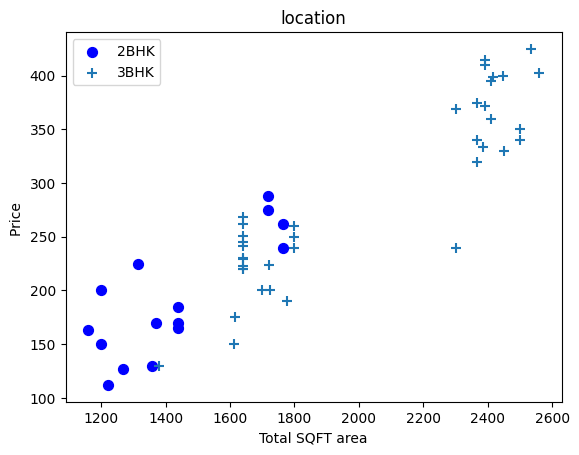

In [38]:
scatterplot_(df2,'Rajaji Nagar')

In [39]:
def remove_bhk_outliers(data):
    exclude_indices = np.array([], dtype=int) 
    
    for location, location_data in data.groupby('location'):
        bhk_stats = {}
        
        
        for bhk, bhk_data in location_data.groupby('bhk'): 
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_data.price_per_sqft),
                'std': np.std(bhk_data.price_per_sqft),
                'count': bhk_data.shape[0]
            }
        
        # Identifying outliers
        for bhk, bhk_data in location_data.groupby('bhk'): 
            stats = bhk_stats.get(bhk - 1) 
            
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_data[bhk_data.price_per_sqft < stats['mean']].index.values)
    
    return data.drop(exclude_indices.astype(int), axis='index') 

df3 = remove_bhk_outliers(df2) 
df3.shape

(7331, 6)

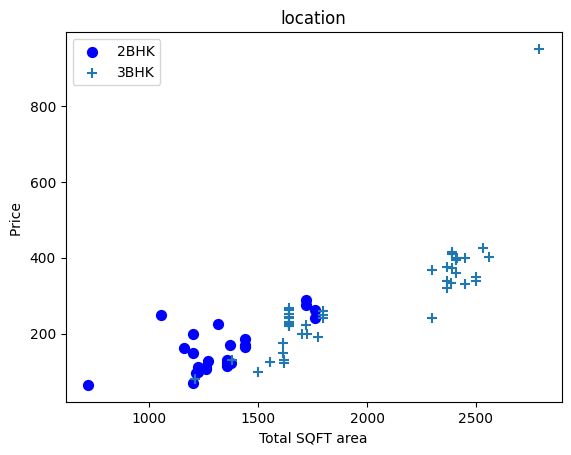

In [40]:
scatterplot_(df,'Rajaji Nagar')

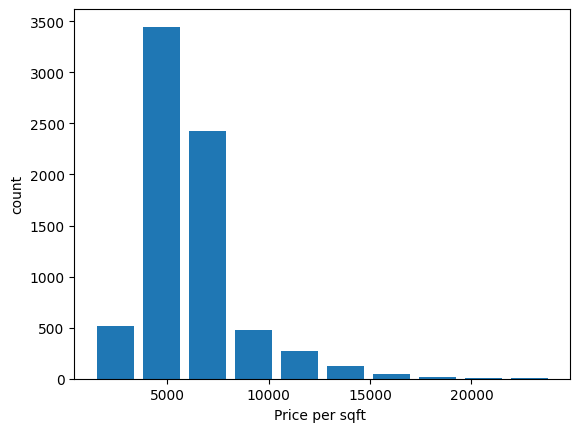

In [41]:
plt.figure.fig_size =(50,100)
plt.hist(df3.price_per_sqft, rwidth= 0.8)
plt.xlabel("Price per sqft ")
plt.ylabel("count")
plt.show()

In [42]:
df3.bath.unique()

array([4., 3., 2., 5., 8., 1., 6., 7., 9.])

In [43]:
df3[df3.bath>8]

,location,total_sqft,bath,price,bhk,price_per_sqft
8459,other,11338.0,9.0,1000.0,6,8819.897689


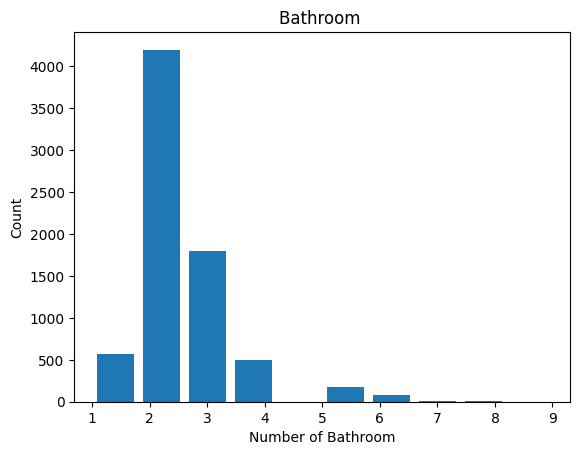

In [44]:
plt.hist(df3['bath'], rwidth =0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("Count")
plt.title ("Bathroom ")
plt.show()

In [45]:
df3[df3.bath > df3.bath+2]

,location,total_sqft,bath,price,bhk,price_per_sqft


In [46]:
df3.drop(['price_per_sqft'],axis =1 , inplace = True)

In [47]:
df3.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Machine learning models for prediction

For Locations Columns We have to do one hot encoding for that we will dummies which will convert our categorical data into numbers.

In [48]:
dummies = pd.get_dummies(df3['location']).astype(int)

In [49]:
df4 = pd.concat([df3,dummies.drop('other',axis =1)] ,axis =1)

In [50]:
df4.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df4.shape

(7331, 255)

In [52]:
X = df4.drop(['price','location'], axis=1)
X.shape


(7331, 253)

In [53]:
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = df4['price']
y.shape

(7331,)

In [55]:
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

* Finding best model. 

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import Ridge

def find_best_model(X, y):
    """
    Automatically finds the best ML model for a given dataset.
    
    Parameters:
        X (DataFrame): Features
        y (Series): Target variable
    
    Returns:
        best_model_name (str): Name of the best model
        best_score (float): Score of the best model
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Detect if it's a classification or regression problem
    is_classification = np.issubdtype(y.dtype, np.integer) and len(np.unique(y)) < 20

    # Define models
    models = {}

    if is_classification:
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000),
            "Random Forest": RandomForestClassifier(),
            "Support Vector Machine": SVC(),
            "K-Nearest Neighbors": KNeighborsClassifier(),
            "Naive Bayes": GaussianNB(),
            "Decision Tree": DecisionTreeClassifier()
        }
        metric = accuracy_score
    else:
        models = {
            "Linear Regression": LinearRegression(),
            "Ridge": Ridge(),
            "Random Forest": RandomForestRegressor(),
            "Support Vector Machine": SVR(),
            "K-Nearest Neighbors": KNeighborsRegressor(),
            "Decision Tree": DecisionTreeRegressor()
        }
        metric = r2_score

    scores = {}

    for name, model in models.items():
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            score = metric(y_test, y_pred)
            scores[name] = score
        except Exception as e:
            print(f"Error training {name}: {e}")

    if not scores:
        print("No models could be trained successfully.")
        return None, None

    # Get the best model
    best_model_name = max(scores, key=scores.get)
    best_score = scores[best_model_name]

    print("\nModel Performance:")
    for name, score in scores.items():
        print(f"{name}: {score:.4f}")

    print(f"\nBest Model: {best_model_name} with Score: {best_score:.4f}")
    return best_model_name, best_score


In [57]:
find_best_model(X, y)


Model Performance:
Linear Regression: 0.8893
Ridge: 0.9022
Random Forest: 0.8524
Support Vector Machine: 0.4405
K-Nearest Neighbors: 0.7097
Decision Tree: 0.8456

Best Model: Ridge with Score: 0.9022


('Ridge', 0.9022356318938487)

* So we can see the best model is Ridge with 90% then we will use this model. 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size =0.20 , random_state = 42)

In [71]:
X_train.shape

(5864, 253)

In [72]:
X_test.shape 

(1467, 253)

In [73]:
from sklearn.linear_model import Ridge

In [74]:
ridge = Ridge().fit(X_train, y_train)

In [75]:
print(f"Accuracy of LinearRegression training score : {ridge.score(X_train, y_train)}")
print(f"Accuracy of LinearRegression Testing score : {ridge.score(X_test, y_test)}")

Accuracy of LinearRegression training score : 0.8767726177287324
Accuracy of LinearRegression Testing score : 0.9022356318938487


In [76]:
def predict_price (location, sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1]  = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return ridge.predict([x])[0]

* Now we can predict the price for the location in bangolore by simply give the inputs 

In [77]:
final_price =predict_price('Vittasandra',1575,5,5)
print(f"The Predicated price is {final_price}")

The Predicated price is 115.90596265689892


/Users/pratiksonune/Downloads/House-Price-Prediction-main/ThoR/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


## Creating a pickle file in local machine

In [78]:
import pickle
with open ('House_price_predication_model.pickle', 'wb') as f:
    pickle.dump(ridge, f)

## Creating a json file in local machine

In [68]:
import json 
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open ("columns.json", "w") as f :
    f.write (json.dumps(columns))